In [1]:
import xarray as xr
from odc.geo.xr import assign_crs
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

## Plot WCF fraction

In [2]:
base = '/g/data/os22/chad_tmp/climate-carbon-interactions/data/'
trees = xr.open_dataset(base+'5km/WCF_5km_monthly_1982_2022.nc')['WCF']
trees = assign_crs(trees, crs ='epsg:4326')
trees = trees.sel(time=slice('2001', '2018'))
trees = trees.mean('time')

gdf = gpd.read_file(f'/{base}LST_harmonization/LGBM/LST_AUS_CLIM_validation_data.geojson')
bio = gpd.read_file('/g/data/os22/chad_tmp/NEE_modelling/data/bioclimatic_regions.geojson')
bio['geometry'] = bio.boundary

## Plot

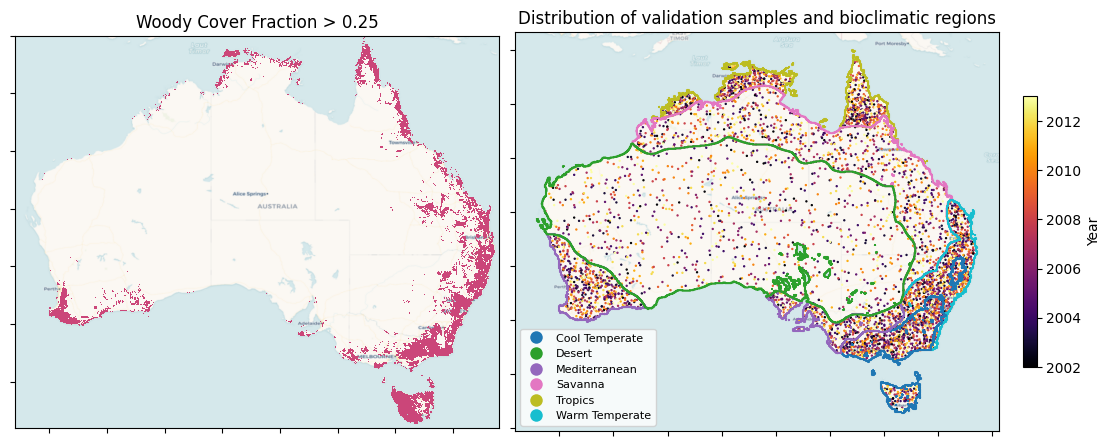

In [10]:
fig,ax=plt.subplots(1,2, figsize=(11,5), layout='constrained')

xr.where(trees>0.25, 1, np.nan).plot(ax=ax[0], cmap='plasma_r', add_labels=False, add_colorbar=False)
ctx.add_basemap(ax[0], source=ctx.providers.CartoDB.Voyager, crs='EPSG:4326', attribution='', attribution_size=1)
ax[0].set_yticklabels([])
ax[0].set_xticklabels([])
ax[0].set_title('Woody Cover Fraction > 0.25')

bio.plot(column='region_name', cmap='tab10', ax=ax[1], alpha=1, legend=True,
         legend_kwds={'loc': 'lower left','markerscale':0.9, 'fontsize':8})
gdf.plot(column='year', markersize=0.5, cmap='inferno', ax=ax[1], legend=True, legend_kwds={'shrink':0.55, 'label':'Year'})
ctx.add_basemap(ax[1], source=ctx.providers.CartoDB.Voyager, crs='EPSG:4326', attribution='', attribution_size=1)
ax[1].set_title('Distribution of validation samples and bioclimatic regions');
ax[1].set_yticklabels([])
ax[1].set_xticklabels([]);

fig.savefig(f'/g/data/os22/chad_tmp/climate-carbon-interactions/results/figs/wcf_and_validation_samples_figure.png', bbox_inches='tight', dpi=300)